# **Red neuronal: Clasificación** - Predicción de sobrevivientes en un accidente automovílistico

In [ ]:
!pip install ucimlrepo

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print("TensorFlow and other warnings have been suppressed")
#Importamos las librerías
from ucimlrepo import fetch_ucirepo
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

TensorFlow and other warnings have been suppressed


In [ ]:
#leemos el csv
df = pd.read_csv('accident.csv')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [ ]:
#utilizamos solo las numéricas
df = df.select_dtypes(include='number')
df.head()

,Age,Speed_of_Impact,Survived
0,56,27.0,1
1,69,46.0,1
2,46,46.0,0
3,32,117.0,0
4,60,40.0,0


In [ ]:
#limpiar los NAs
df=df.dropna()

In [ ]:
#visualización
df.describe()

,Age,Speed_of_Impact,Survived
count,197.000000,197.000000,197.000000
mean,43.456853,70.441624,0.507614
std,15.053456,30.125298,0.501216
min,18.000000,20.000000,0.000000
25%,31.000000,43.000000,0.000000
50%,44.000000,71.000000,1.000000
75%,56.000000,95.000000,1.000000
max,69.000000,119.000000,1.000000


In [ ]:
# Scatter plot matrix
features = df.drop(["Survived"], axis=1).columns
fig = px.scatter_matrix(data_frame=df,
                        dimensions=features,
                        color=df['Survived'])
fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False)
fig.update_layout(width=900, height=600, title="Survived Detection", font_size=9)
fig.show()

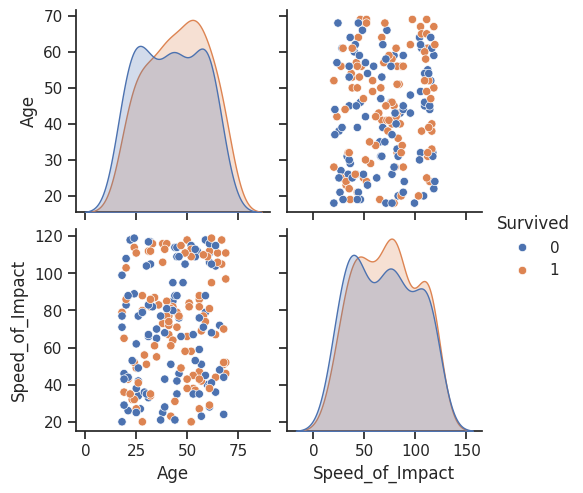

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Survived");

A simple vista, ninguna variable clasifica perfectamente la diferencia entre los que sobrevivieron y no sobrevivieron.

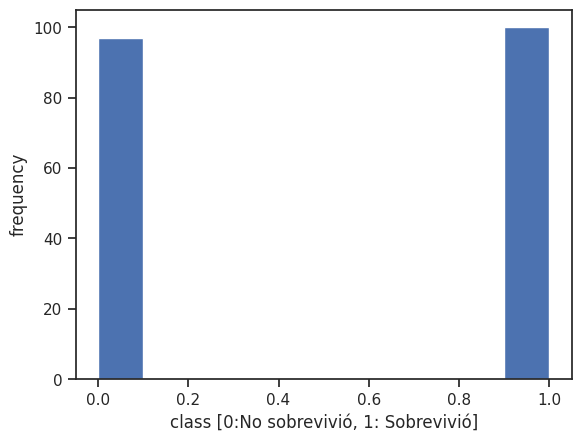

In [ ]:
#histograma
plt.hist(df['Survived']);
plt.xlabel('class [0:No sobrevivió, 1: Sobrevivió]')
plt.ylabel('frequency');

In [ ]:
# Parralel Coordinate plot
fig = px.parallel_coordinates(df.drop(['Survived'], axis=1),
                              color=df['Survived'].astype(int),
                              dimensions=features,
                              color_continuous_scale = px.colors.diverging.Tealrose,
                              title='Survived Detection',
                              width=1000)
fig.show()

## **Entrenamiento y evaluación del modelo**

In [ ]:
# Set a global seed for reproducibility
tf.random.set_seed(4500)

Es la semilla para la reproductibilidad

In [ ]:
X = df.drop(["Survived"], axis=1)
y = df['Survived']

Diferenciamos la variable dependiente de las independientes

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((157, 2), (40, 2), (157,), (40,))

Separamos los datos en train y test. Fue el 80% de train y el 20% de test.

In [ ]:
# Estandarizamos las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definimos el modelo
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(2,)), #al no usar las variables categóricas, tuvimos que cambiar el número de variables
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
model = get_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  min_delta=0.005,
                                                  mode='min',
                                                  verbose=1)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5479 - loss: 0.8082 
Test Accuracy: 0.5250


El accuracy es solamente del 52.5%, lo que indica que es un performance bajo.
La función de pérdida es de 0.8976 es muy alto, entonces su error es muy alto, no tiene buen aprendizaje.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.20, callbacks=[early_stopping])

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5162 - loss: 0.7498 - val_accuracy: 0.4375 - val_loss: 0.8164
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5162 - loss: 0.7488 - val_accuracy: 0.4375 - val_loss: 0.8156
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5162 - loss: 0.7478 - val_accuracy: 0.4375 - val_loss: 0.8148
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5162 - loss: 0.7469 - val_accuracy: 0.4688 - val_loss: 0.8140
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5162 - loss: 0.7460 - val_accuracy: 0.4688 - val_loss: 0.8132
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5162 - loss: 0.7451 - val_accuracy: 0.4688 - val_loss: 0.8124
Epoch 6: early stopping


Llegó hasta 87 épocas. No se continuó optimizando el modelo porque ya no podía mejorar. Mejoró ligeramente el rendimiento y bajó su función de pérdida, sin embargo, no fue tan significativo el cambio.

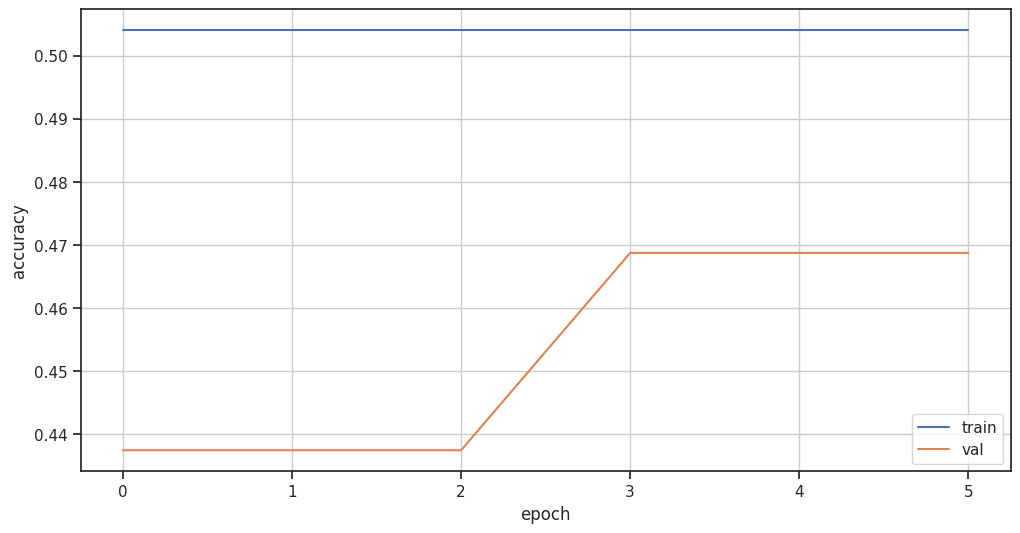

In [ ]:
# Plot validation and testing accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.grid();

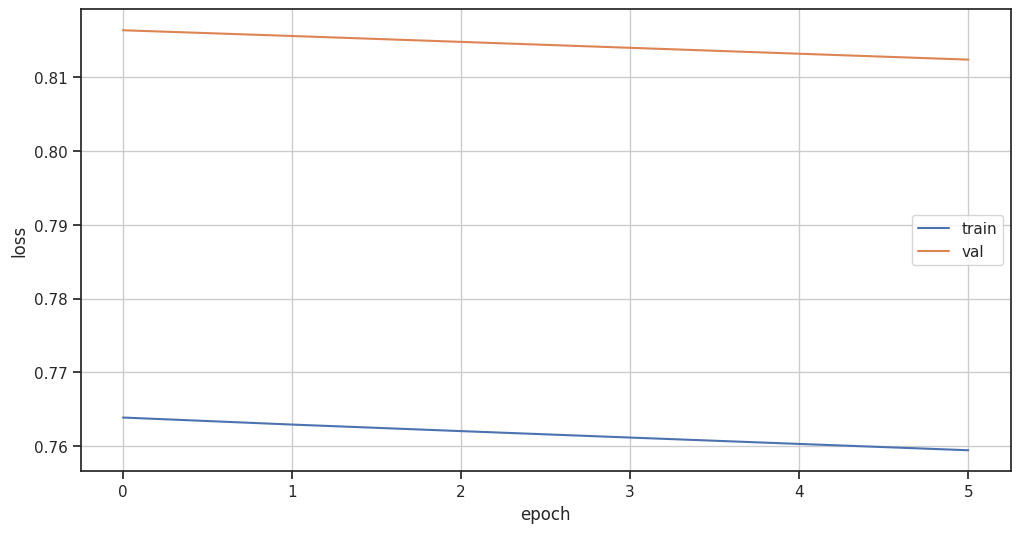

In [ ]:
# Plot validation and testing loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.grid();

In [ ]:
# Print weights
weights = model.layers[0].get_weights()
print(weights)

[array([[ 0.25810665],
       [-0.82643676]], dtype=float32), array([0.00599118], dtype=float32)]


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5479 - loss: 0.8034
Test Accuracy: 0.5250


In [ ]:
# Predict on new data
indx = np.random.randint(low=0, high=y_test.shape[0])
xi = np.array([X_test[indx,:]])
prediction = model.predict(xi)
print(f"Input: {xi} \t Target: {y_test.iloc[indx]} \t Prediction: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Input: [[0.09110758 0.20236558]] 	 Target: 1 	 Prediction: 0.4656


In [ ]:
from sklearn.metrics import confusion_matrix

y_predictions = model.predict(X_test) > 0.5
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step 


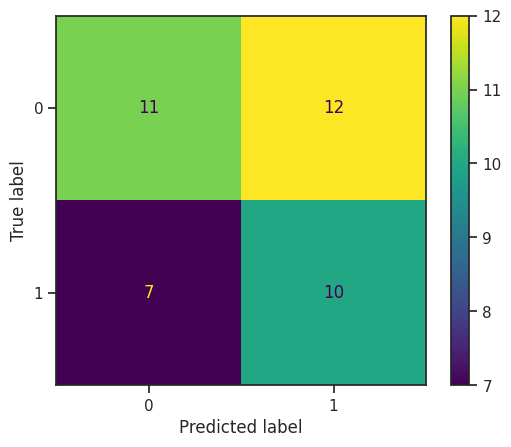

In [ ]:
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
display_matrix.plot()

In [ ]:
def get_performance_metrics(c_matrix):
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall)/(precision + recall)
    return accuracy, precision, recall, specificity, f1_score

accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.525000
Precision: 0.454545
Recall: 0.588235
Specificity: 0.478261
F1-score: 0.512821


**Guardar el modelo**

In [ ]:
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Now save the model
model.save('models/single-neuron-model-survived-detection.keras')

In [ ]:
model_file = 'models/single-neuron-model-survived-detection.keras'
new_model = tf.keras.models.load_model(model_file, custom_objects=None, compile=True, safe_mode=True)
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = new_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5479 - loss: 0.8034 
Test Accuracy: 0.5250


In [ ]:
# Predict on new data
indx = np.random.randint(low=0, high=y_test.shape[0])
xi = np.array([X_test[indx,:]])
prediction = new_model.predict(xi)
print(f"Input: {xi} \t Target: {y_test.iloc[indx]} \t Prediction: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Input: [[-0.37460048 -1.44156094]] 	 Target: 0 	 Prediction: 0.7504
